1)Details.
A deep learning model based on plants.
The dataset contains 30 types of plants images, including 21000 training images, 3000 validation images and 6000 test images, with a total data size of 1.48GB, and supports the recognition of the following plants types: aloevera, banana, bilimbi, cantaloupe, cassava, coconut, corn, cucumber, curcuma, eggplant, galangal, ginger, guava, kale, longbeans, mango, melon, orange, paddy, papaya, peperchili, pineapple, pomelo, shallot, soybeans, spinach, sweetpotatoes, tobacco, waterapple, and watermelon.

2)data preprocessing

In [2]:
pip install numpy


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/e8/06/0512e2582fd27bb7b358fa1e4ffc0f6c89c89f5ada31df58c5fa93171098/numpy-1.26.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached numpy-1.26.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (115 kB)
Using cached numpy-1.26.1-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/50/8b/2057417a07a6fee8ed8be40e37bac4a502cae4cf44468a02962bbe81b8af/scipy-1.11.3-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached scipy-1.11.3-cp311-cp311-macosx_12_0_arm64.whl.metadata (165 kB)
Using cached scipy-1.11.3-cp311-cp311-macosx_12_0_arm64.whl (29.7 MB)

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/de/ea/90267db2c02fb61f4d03b9645c7446d3cbca6d5c08522e889535c88edfcd/tensorflow-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-macos==2.14.0 from https://files.pythonhosted.org/packages/d3/4b/ae9037ea22ba94eb2cf267e991384c3444f3e6142fa49923352b4ab73e14/tensorflow_macos-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow_macos-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.9 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency info

In [10]:
pip install pillow


  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/c3/5b/6bcfd0c2631d1ce4bb29ea597556ed2783404c5ad38635caf7b3f2b19073/Pillow-10.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached Pillow-10.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.5 kB)
Using cached Pillow-10.1.0-cp311-cp311-macosx_11_0_arm64.whl (3.3 MB)

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


data_dir = '/Users/vara/downloads/archive'  


batch_size = 32
image_size = (224, 224)
num_classes = 30  

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)


train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(train_generator.class_indices)


model = Sequential()  

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(train_generator, epochs=5, validation_data=test_generator)



Found 21000 images belonging to 30 classes.
Found 6000 images belonging to 30 classes.
{'aloevera': 0, 'banana': 1, 'bilimbi': 2, 'cantaloupe': 3, 'cassava': 4, 'coconut': 5, 'corn': 6, 'cucumber': 7, 'curcuma': 8, 'eggplant': 9, 'galangal': 10, 'ginger': 11, 'guava': 12, 'kale': 13, 'longbeans': 14, 'mango': 15, 'melon': 16, 'orange': 17, 'paddy': 18, 'papaya': 19, 'peperchili': 20, 'pineapple': 21, 'pomelo': 22, 'shallot': 23, 'soybeans': 24, 'spinach': 25, 'sweetpotatoes': 26, 'tobacco': 27, 'waterapple': 28, 'watermelon': 29}
Epoch 1/5
657/657 [==============================] - 786s 1s/step - loss: 3.2189 - accuracy: 0.0698 - val_loss: 2.7864 - val_accuracy: 0.1848
Epoch 2/5
657/657 [==============================] - 770s 1s/step - loss: 2.8057 - accuracy: 0.1692 - val_loss: 2.5951 - val_accuracy: 0.2180
Epoch 3/5
657/657 [==============================] - 765s 1s/step - loss: 2.6587 - accuracy: 0.2070 - val_loss: 2.4690 - val_accuracy: 0.2325
Epoch 4/5
657/657 [===================

Data visulization

Found 21000 images belonging to 30 classes.


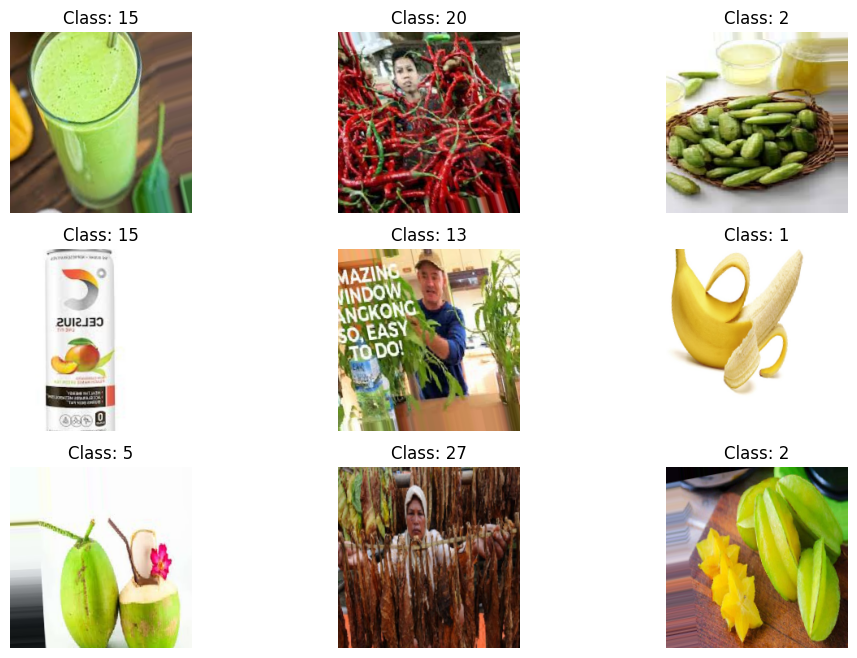

Epoch 1/5
657/657 [==============================] - 698s 1s/step - loss: 3.0317 - accuracy: 0.1336 - val_loss: 2.5550 - val_accuracy: 0.2442
Epoch 2/5
657/657 [==============================] - 698s 1s/step - loss: 2.6479 - accuracy: 0.2137 - val_loss: 2.3618 - val_accuracy: 0.2907
Epoch 3/5
657/657 [==============================] - 702s 1s/step - loss: 2.5015 - accuracy: 0.2568 - val_loss: 2.2547 - val_accuracy: 0.3265
Epoch 4/5
657/657 [==============================] - 703s 1s/step - loss: 2.4131 - accuracy: 0.2847 - val_loss: 2.1471 - val_accuracy: 0.3548
Epoch 5/5
657/657 [==============================] - 702s 1s/step - loss: 2.3251 - accuracy: 0.3087 - val_loss: 2.0459 - val_accuracy: 0.4065


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


data_dir = '/Users/vara/downloads/archive'  


batch_size = 32
image_size = (224, 224)
num_classes = 30  


train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


visualization_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'  
)


images, labels = next(visualization_generator)


plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f'Class: {np.argmax(labels[i])}')
    plt.axis('off')

plt.show()

#CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=5, validation_data=test_generator)





curves


In [ ]:
pip install matplotlib

Found 21000 images belonging to 30 classes.


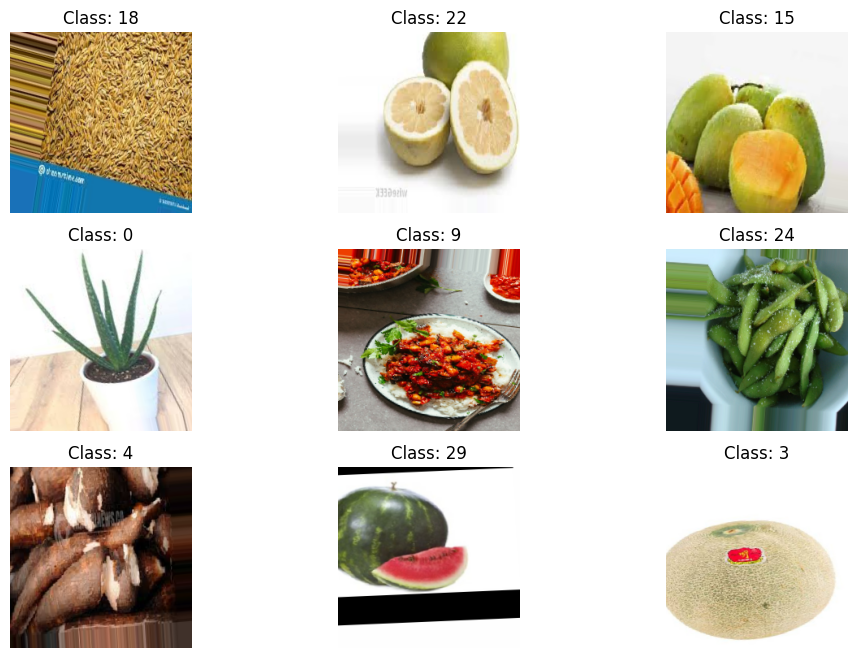

Epoch 1/5
657/657 [==============================] - 693s 1s/step - loss: 3.1705 - accuracy: 0.0926 - val_loss: 2.6857 - val_accuracy: 0.1953
Epoch 2/5
657/657 [==============================] - 1529s 2s/step - loss: 2.7340 - accuracy: 0.1889 - val_loss: 2.4041 - val_accuracy: 0.2677
Epoch 3/5
657/657 [==============================] - 710s 1s/step - loss: 2.5908 - accuracy: 0.2351 - val_loss: 2.3446 - val_accuracy: 0.2982
Epoch 4/5
657/657 [==============================] - 702s 1s/step - loss: 2.4817 - accuracy: 0.2620 - val_loss: 2.2222 - val_accuracy: 0.3463
Epoch 5/5
657/657 [==============================] - 918s 1s/step - loss: 2.3782 - accuracy: 0.2951 - val_loss: 2.1247 - val_accuracy: 0.3747
Epoch 1/5
657/657 [==============================] - 1124s 2s/step - loss: 2.3091 - accuracy: 0.3189 - val_loss: 2.0688 - val_accuracy: 0.3978
Epoch 2/5
657/657 [==============================] - 843s 1s/step - loss: 2.2576 - accuracy: 0.3304 - val_loss: 1.9351 - val_accuracy: 0.4333
Epoc

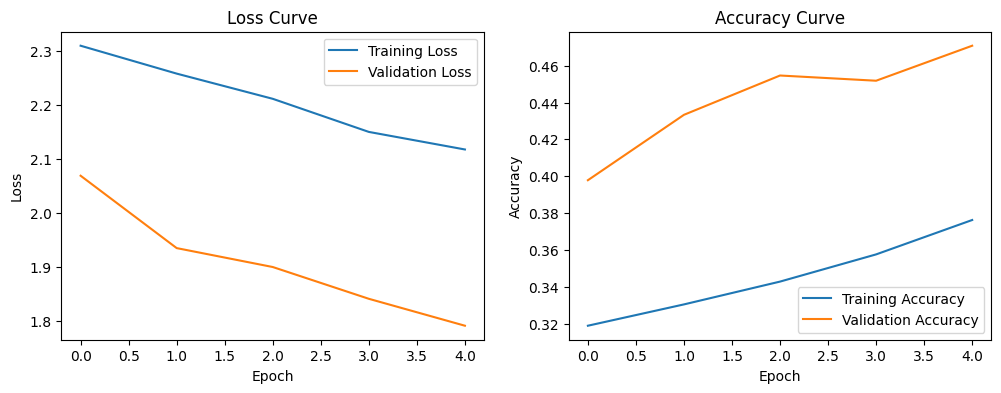

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


data_dir = '/Users/vara/downloads/archive'  


batch_size = 32
image_size = (224, 224)
num_classes = 30  

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


visualization_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'  
)


images, labels = next(visualization_generator)


plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f'Class: {np.argmax(labels[i])}')
    plt.axis('off')

plt.show()

# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=5, validation_data=test_generator)



history = model.fit(train_generator, epochs=5, validation_data=test_generator)

# loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

#  accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


data_dir = '/Users/vara/downloads/archive'  


batch_size = 32
image_size = (224, 224)
num_classes = 30


train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_generator, epochs=5, validation_data=test_generator)


model.save('project.keras')


testing

In [ ]:
import test

In [ ]:

model = 'project.h5'  

#  list of class names 
classes = [ "aloevera", "banana", "bilimbi", "cantaloupe", "cassava", "coconut",
    "corn", "cucumber", "curcuma", "eggplant", "galangal", "ginger",
    "guava", "kale", "longbeans", "mango", "melon", "orange", "paddy",
    "papaya", "peperchili", "pineapple", "pomelo", "shallot", "soybeans",
    "spinach", "sweetpotatoes", "tobacco", "waterapple", "watermelon"]



def predict_image(input_image):

    plt.imshow(input_image)
    plt.axis('off')
    

   
    resized_image = image.array_to_img(input_image).resize((224, 224))

    
    img_array = img_to_array(resized_image)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  

    
    predictions = model.predict(img_array)

    
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = classes[predicted_class_index]

    
    return f"Predicted Class: {predicted_class} ({predicted_class_index})"

# Gradio Interface
iface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(),
    outputs=gr.Textbox()  
)


iface.launch()
